In [1]:
import json
import random
from io import BytesIO
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.datasets import ImageFolder
from streaming import StreamingDataset

In [2]:
# Load readable labels
with open("aux/imagenet-simple-labels.json", "r") as f:
    labels = json.load(f)

In [3]:
# Load the dataset (train or val) (folder or MDS)

subset = 'val' # 'train' or 'val'

dataset = StreamingDataset(local=f"data/mds/ILSVRC2012_img_{subset}")

validate = True
reference = None
if validate:
    reference = ImageFolder(f"data/untar/ILSVRC2012_img_{subset}")

In [4]:
print(f"  Dataset loaded with {len(dataset)} samples")
print(f"Reference loaded with {len(reference)} samples")

  Dataset loaded with 50000 samples
Reference loaded with 50000 samples


In [5]:
labels[:5]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark']

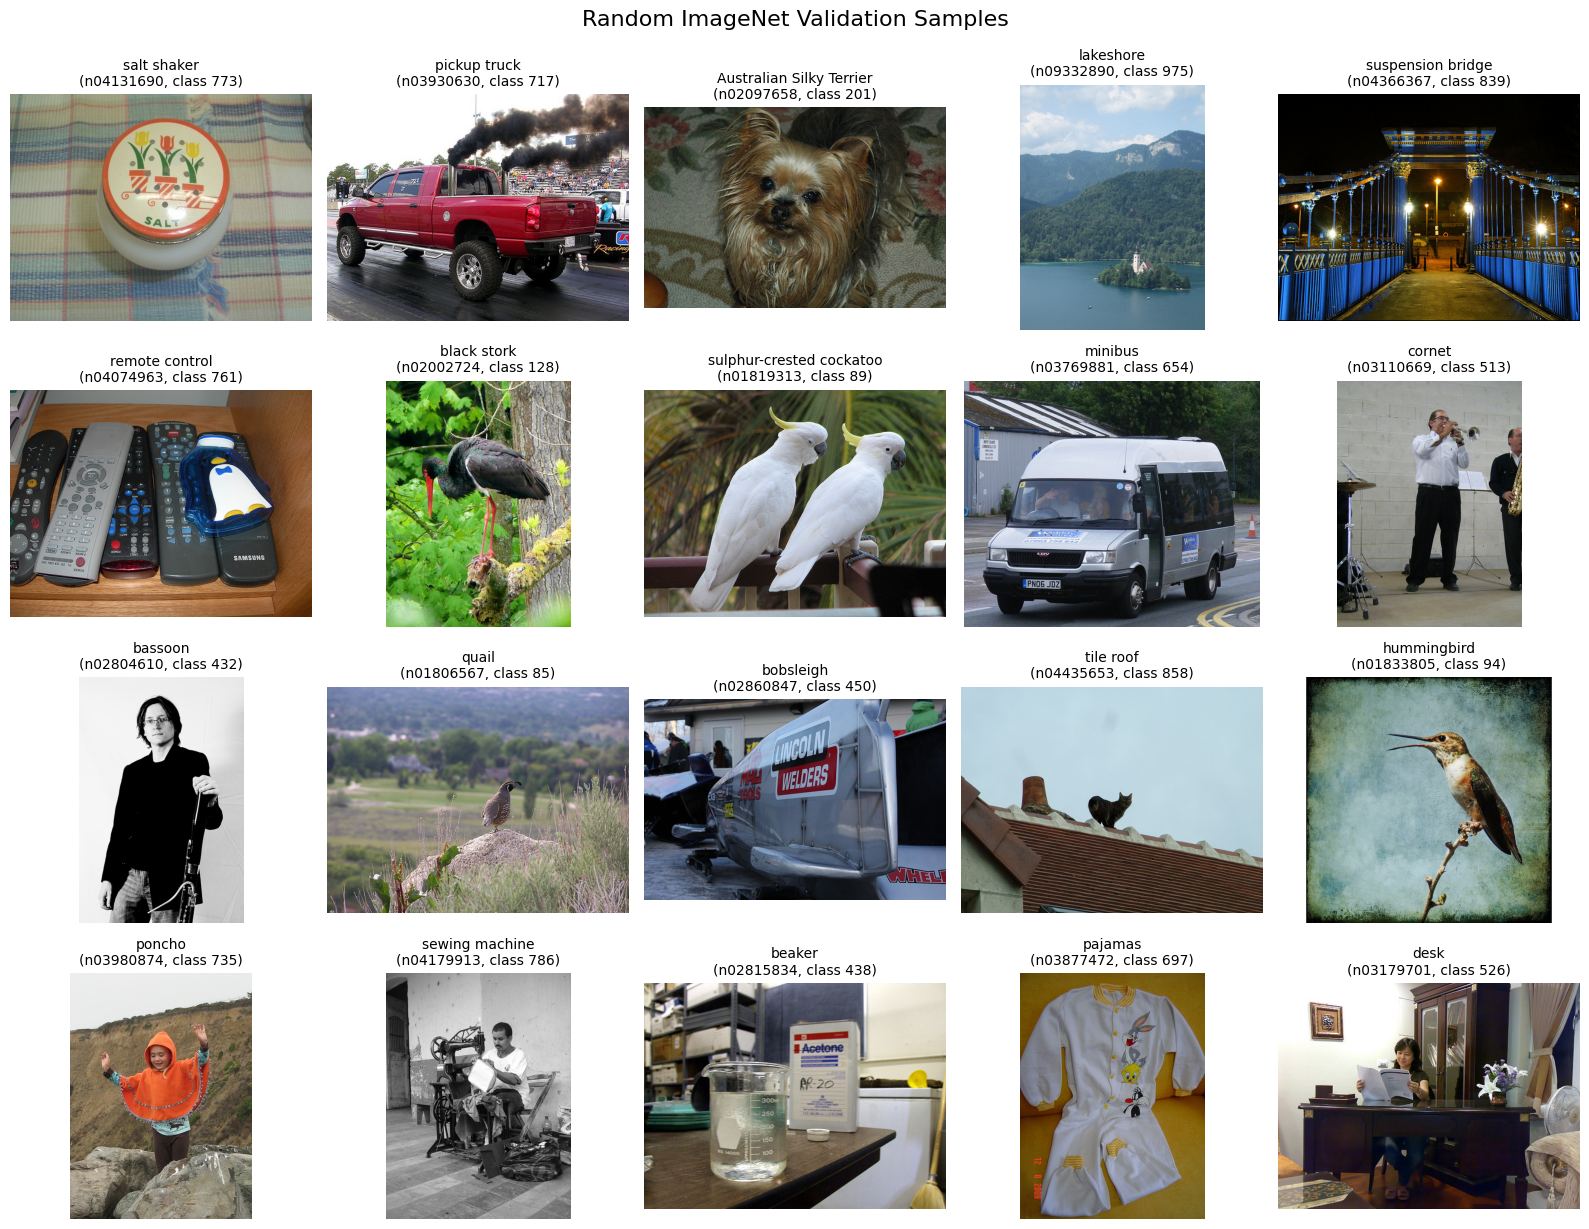

In [6]:
# Display random samples
seed = 42
num_samples = 20
fig, axes = plt.subplots(4, 5, figsize=(16, 12))
axes = axes.flatten()
# Get random indices
rng = np.random.default_rng(seed)
random_indices = rng.choice(range(len(dataset)), replace=False, size=num_samples)

for idx, ax in enumerate(axes):
    sample_idx = random_indices[idx]
    sample = dataset[sample_idx]
    
    # Extract data
    image = sample["x"]           # PIL Image (auto-decoded from JPEG)
    class_id = sample["y"]        # class label (0-999)
    wnid = sample["wnid"]         # wordnet id
    original_index = sample['i']  # index in original data

    # Convert to RGB if needed
    if image.mode != "RGB":
        image = image.convert("RGB")

    if validate:
        reference_image, reference_label = reference[original_index]
        if reference_image.mode != "RGB":
            image = reference_image.convert("RGB")
        assert reference_label == class_id
        assert (np.array(reference_image) == np.array(image)).all()
    
    # Get readable label
    readable_label = labels[class_id]
    
    # Display
    ax.imshow(image)
    ax.set_title(f"{readable_label}\n({wnid}, class {class_id})", fontsize=10)
    ax.axis("off")
    
plt.tight_layout()
plt.suptitle("Random ImageNet Validation Samples", fontsize=16, y=1.02)
plt.show()

In [7]:
# Print some statistics
print(f"\nDataset statistics:")
print(f"Total samples: {len(dataset)}")
print(f"Expected classes: 1000")
print(f"Sample keys: {list(dataset[0].keys())}")


Dataset statistics:
Total samples: 50000
Expected classes: 1000
Sample keys: ['i', 'wnid', 'x', 'y']
